In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.backends.backend_pdf import PdfPages
import dpkt
import numpy as np
import time
import brewer2mpl

from analyze import compute_global_throughput, parse_file, removeOutliers
from read_conf import ReadHosts

host_to_ip, ip_to_host = ReadHosts('experiment.conf')
interval = 5
root_level = 'workdir/results-hping/'

In [9]:
linestyles = ['-', '--', '-.', ':']
markers = []
for m in Line2D.markers:
    try:
        if len(m) == 1 and m != ' ':
            markers.append(m)
    except TypeError:
        pass

styles = markers + [
    r'$\lambda$',
    r'$\bowtie$',
    r'$\circlearrowleft$',
    r'$\clubsuit$',
    r'$\checkmark$']

In [10]:
def get_througput_array (entry, interval_s):
    num_buckets = np.size(entry.inbytes)
    buckets = np.arange(0, num_buckets * interval_s, interval_s)

    bps = 10e-6 * entry.inbytes * 8 / interval_s
    
    return buckets, bps

In [11]:
def compute_everything(prefix='results-hping-', capfile='servernode-log_agent-tcpdump.cap',
                       verbose=False, postfix=['nodefense','cookies','challenges','challenges-k8'], 
                       shost='servernode'):
    throughput = {}
    for post in postfix:
        filename = root_level + prefix + post
        print "Generating throughput for %s" % filename
        filename += '/' + capfile

        start_time = time.time()
        throughput[post] = compute_global_throughput(filename, interval, host_to_ip[shost])
        end_time = time.time()
        if verbose:
            print "Time taken is ", end_time - start_time
            
    return throughput

In [33]:
def plot_throughput(in_throughput, in_host_to_ip, postfix=['nodefense','cookies','challenges'], host='clientnode-1',
                    labels=['nodefense','cookies','challenges-m17'], 
                   ystart=[-2,-10], yincr=[5,50], ylimincr=[5,50], plt_title=['Client','Server']):
    

    bmap = brewer2mpl.get_map('PuOr', 'Diverging', 4)
    colors = bmap.mpl_colors

    #pp = PdfPages('throughput-exp2.pdf')
    
    params = {
       'axes.labelsize': 9,
       'text.fontsize': 10,
       'legend.fontsize': 9,
       'legend.handlelength': 2,
       'xtick.labelsize': 8,
       'ytick.labelsize': 8,
       'text.usetex': False,
       'figure.figsize': [6, 2]
       }
    plt.rcParams.update(params)

    #figure, ax = plt.subplots()
    fig = plt.figure()#figsize=(10,10))
    #fig.subplots_adjust(hspace = 0.5, wspace=0.1)
    k = 1
    #l = []
    #ax = plt.gca()
    
    for host_entry in host:
        host_ip = in_host_to_ip[host_entry]
        ax = fig.add_subplot(1,2,k)
        #ax.axis('off')
        
        plotnum = 0
        for post in postfix:
            maxbps = 0
            
            th = in_throughput[post]
            host_th = th[host_ip]

            host_bucket, host_bps = get_througput_array (host_th, interval_s=interval)
            
            ax.plot(host_bucket, host_bps, marker=None, markerfacecolor='none', 
                    label=labels[plotnum], linewidth=2, color=colors[plotnum])
            plotnum += 1
            
        #l.append (l1)
        maxbps = np.maximum(maxbps, np.max(host_bps))

        plt.title(plt_title[k-1])
        ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
        ax.set_ylim(ystart[k-1], maxbps+ylimincr[k-1])
        ax.set_xticks([0,100,200,300,400,500,600])

        # set y ticks
        yrange = np.arange (0,maxbps+ylimincr[k-1],yincr[k-1])
        ax.set_yticks(yrange)

        #if k%2==0:
        #    ax.set_yticklabels([])

        #if k%2==0:
        #    
        if not k%2==0:
            ax.set_ylabel('Throughput (Mbps)')
        
        ax.set_xlabel('Time (seconds)')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.tick_params(axis='x', direction='out')
        ax.tick_params(axis='y', length=0)
        # offset the spines
        #for spine in ax.spines.values():
        #  spine.set_position(('outward', 5))
        # put the grid behind
        ax.set_axisbelow(True)

        ax.axvspan(120,480,color='red', alpha=0.1)
        k += 1
        

    if len(fig.axes)%2 == 0:
        ax = fig.axes[-2]
    else:
        ax = fig.axes[-1]
    
    legend = ax.legend(loc = 9, ncol=5, bbox_to_anchor=(1.05, -0.2),borderaxespad=1.0)
    frame = legend.get_frame()
    frame.set_facecolor('1')
    frame.set_edgecolor('0.75')
 
    plt.savefig('paper-plots/throughput-exp2.pdf', bbox_inches = 'tight')
    #plt.show()
    #pp.savefig()
    #pp.close()

In [31]:
throughput = compute_everything(verbose=True)

Generating throughput for workdir/results-hping/results-hping-nodefense
Time to read pcap file 0.000699996948242
Time taken is  170.91898489
Generating throughput for workdir/results-hping/results-hping-cookies
Time to read pcap file 0.000234127044678
Time taken is  223.576259851
Generating throughput for workdir/results-hping/results-hping-challenges
Time to read pcap file 0.00025486946106
Time taken is  183.054833174
Generating throughput for workdir/results-hping/results-hping-challenges-k8
Time to read pcap file 0.000200986862183
Time taken is  209.561491013


In [14]:
throughput_ch = compute_everything(verbose=True, postfix=['challenges'])

Generating throughput for workdir/results-hping/results-hping-challenges
Time to read pcap file 0.000359058380127
Time taken is  185.401985884


In [15]:
throughput_ch_k8 = compute_everything(verbose=True, postfix=['challenges-k8'])

Generating throughput for workdir/results-hping/results-hping-challenges-k8
Time to read pcap file 0.000349998474121
Time taken is  210.600626945


In [16]:
# temporary, remove when reloading the kernel
throughput['challenges'] = throughput_ch['challenges']
throughput['challenges-k8'] = throughput_ch_k8['challenges-k8']

# Client throughput

10.1.5.3
10.1.8.3


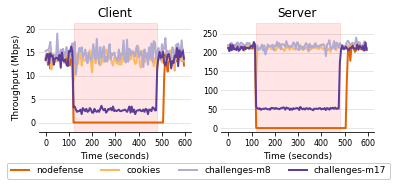

In [34]:
print host_to_ip['servernode']
print host_to_ip['clientnode-1']
plot_throughput(throughput, host_to_ip, postfix=['nodefense','cookies','challenges-k8', 'challenges'],
                labels=['nodefense','cookies', 'challenges-m8', 'challenges-m17'],
               yincr=[5,50], ylimincr=[5,50], host=['clientnode-6', 'servernode'])

# Server throughput

In [ ]:
plot_throughput(throughput, host_to_ip, postfix=['nodefense','cookies','challenges', 'challenges-k8'], 
                host='servernode', yincr=50, ylimincr=50)